<a href="https://colab.research.google.com/github/WhitneyMadafali/IS-Project/blob/develop/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,SoilMoisture,temperature,Humidity,Irrigation
0,400,30,15,0
1,200,30,32,0
2,300,21,28,0
3,500,40,22,0
4,700,23,34,0


In [5]:
df.tail()

,SoilMoisture,temperature,Humidity,Irrigation
496,675,25,19,1
497,210,23,17,0
498,398,25,18,0
499,678,24,18,1
500,201,21,14,0


In [6]:
df.size

2004

In [7]:
df.shape

(501, 4)

In [8]:
df.columns

Index(['SoilMoisture', 'temperature', 'Humidity', 'Irrigation'], dtype='object')

In [9]:
df['Irrigation'].unique()

array([0, 1])

In [10]:
df.dtypes

SoilMoisture    int64
temperature     int64
Humidity        int64
Irrigation      int64
dtype: object

In [11]:
df['Irrigation'].value_counts()

0    304
1    197
Name: Irrigation, dtype: int64

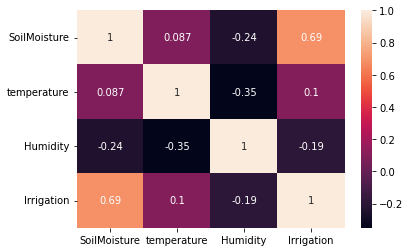

In [12]:
sns.heatmap(df.corr(),annot=True)

Separating features and target label

In [13]:
features = df[['SoilMoisture','temperature', 'Humidity']]
target = df['Irrigation']
labels = df['Irrigation']

In [14]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# **kNN**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(Xtrain,Ytrain)
predicted_values = knn.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('knn')
print("kNN's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

kNN's Accuracy is:  0.8514851485148515
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        59
           1       0.83      0.81      0.82        42

    accuracy                           0.85       101
   macro avg       0.85      0.85      0.85       101
weighted avg       0.85      0.85      0.85       101



In [41]:
# Cross validation score (kNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.68316832, 0.75      , 0.77      , 0.86      , 0.75      ])

# **Decision Tree Model**

In [16]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  81.1881188118812
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        59
           1       0.81      0.71      0.76        42

    accuracy                           0.81       101
   macro avg       0.81      0.80      0.80       101
weighted avg       0.81      0.81      0.81       101



In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.66336634, 0.79      , 0.84      , 0.9       , 0.83      ])

# **Guassian Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.8217821782178217
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        59
           1       0.80      0.76      0.78        42

    accuracy                           0.82       101
   macro avg       0.82      0.81      0.82       101
weighted avg       0.82      0.82      0.82       101



In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.69306931, 0.74      , 0.8       , 0.81      , 0.86      ])

# **Support Vector Machine**

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8712871287128713
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        59
           1       0.84      0.86      0.85        42

    accuracy                           0.87       101
   macro avg       0.87      0.87      0.87       101
weighted avg       0.87      0.87      0.87       101



In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.76237624, 0.76      , 0.74      , 0.89      , 0.91      ])

# **Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.8415841584158416
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        59
           1       0.81      0.81      0.81        42

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.84      0.84      0.84       101



In [26]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.74257426, 0.75      , 0.76      , 0.92      , 0.91      ])

# **Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)
predicted_values = RF.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.8910891089108911
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.84      0.90      0.87        42

    accuracy                           0.89       101
   macro avg       0.89      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101



In [28]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.72277228, 0.79      , 0.83      , 0.8       , 0.78      ])

# **XGBoost**

In [29]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)
predicted_values = XB.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.900990099009901
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        59
           1       0.83      0.95      0.89        42

    accuracy                           0.90       101
   macro avg       0.90      0.91      0.90       101
weighted avg       0.91      0.90      0.90       101



In [30]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.7029703, 0.79     , 0.8      , 0.84     , 0.79     ])

# **Accuracy Comparison**

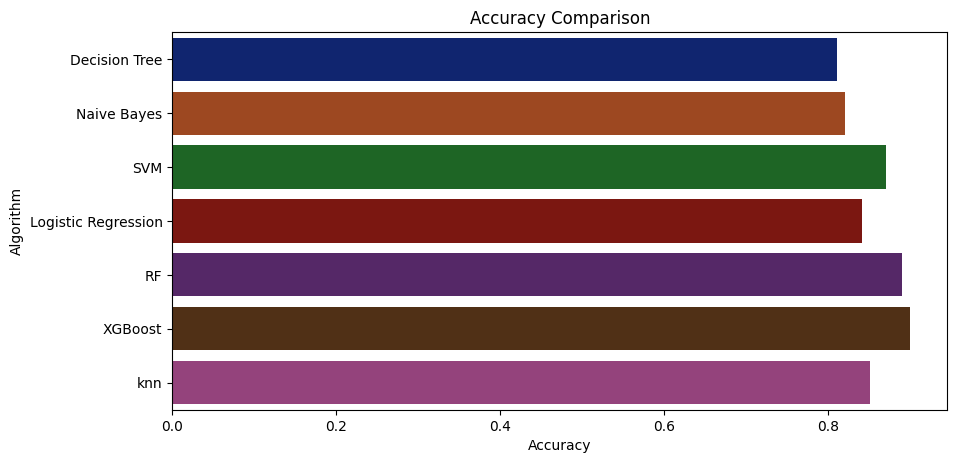

In [42]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')


In [44]:
data = np.array([[540,29,18]])
prediction = RF.predict(data)
print(prediction)

[1]


In [36]:
data = np.array([[100,19,15]])
prediction = RF.predict(data)
print(prediction)

[0]
